In [7]:
import pandas as pd

data = pd.read_csv('iris.csv')
x = data.iloc[:, 0:4]
y = data.iloc[:, 4:]

In [8]:
# Encode Categorical Variable
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(y)
print(ohe.categories_)

y = ohe.transform(y)
print(y)

[array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)]
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]


In [2]:
import torch
import torch.nn as nn

class Multiclass(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(4, 8)
        self.act = nn.ReLU()
        self.output = nn.Linear(8, 3)
            
    def forward(self, x):
        x = self.act(self.hidden(x))
        x = self.output(x)
        return x
    
model = Multiclass()

In [5]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [9]:
import tqdm

# convert pandas Dataframe (x) and numpy array (y) into Pytorch Tensors
x = torch.tensor(x.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# Train parameters
n_epochs = 200
batch_size = 5
batches_per_epoch = len(x)

for epoch in range(n_epochs):
    with tqdm.trange(batches_per_epoch, unit='batch', mininterval=0) as bar:
        bar.set_description(f'Epoch {epoch}')
        for i in bar:
            # Take a batch
            start = i * batch_size
            x_batch = x[start:start+batch_size]
            y_batch = y[start:start+batch_size]
            # forward pass
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()

Epoch 199: 100%|██████████| 149/149 [00:00<00:00, 160.90batch/s]


In [ ]:
# from sklearn.model_selection import train_test_split

data = pd.read_csv('iris.csv')
x = data.iloc[:, 0:4]
y = data.iloc[:, 4:]

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False).fit(y)
y = ohe.transform(y)

# convert pandas Dataframe (x) and numpy array (y) into Pytorch Tensors
x = torch.tensor(x.values, dtype=torch.float32)
y = torch.tensor(y, dtype=torch.float32)

# split into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, shuffle=True)

In [15]:
n_epochs = 200
batch_size = 5
batches_per_epoch = len(x)

for epoch in range(n_epochs):
    with tqdm.trange(batches_per_epoch, unit='batch', mininterval=0) as bar:
        bar.set_description(f'Epoch {epoch}')
        for i in bar:
            # Take a batch
            start = i * batch_size
            x_batch = x[start:start+batch_size]
            y_batch = y[start:start+batch_size]
            # forward pass
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            
    y_pred = model(x_test)
    ce = loss_fn(y_pred, y_test)
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    print(f'Epoch {epoch} validation: Cross-entropy={float(ce)}, Accuracy={float(acc)}')

Epoch 0: 100%|██████████| 149/149 [00:01<00:00, 145.21batch/s]


Epoch 0 validation: Cross-entropy=0.050397228449583054, Accuracy=0.9809523820877075


Epoch 1: 100%|██████████| 149/149 [00:00<00:00, 152.51batch/s]


Epoch 1 validation: Cross-entropy=0.05035044252872467, Accuracy=0.9809523820877075


Epoch 2: 100%|██████████| 149/149 [00:00<00:00, 156.34batch/s]


Epoch 2 validation: Cross-entropy=0.05012679472565651, Accuracy=0.9809523820877075


Epoch 3: 100%|██████████| 149/149 [00:00<00:00, 165.11batch/s]


Epoch 3 validation: Cross-entropy=0.04993494972586632, Accuracy=0.9809523820877075


Epoch 4: 100%|██████████| 149/149 [00:01<00:00, 141.27batch/s]


Epoch 4 validation: Cross-entropy=0.049956854432821274, Accuracy=0.9809523820877075


Epoch 5: 100%|██████████| 149/149 [00:00<00:00, 154.47batch/s]


Epoch 5 validation: Cross-entropy=0.04971098527312279, Accuracy=0.9809523820877075


Epoch 6: 100%|██████████| 149/149 [00:00<00:00, 163.73batch/s]


Epoch 6 validation: Cross-entropy=0.04953297972679138, Accuracy=0.9809523820877075


Epoch 7: 100%|██████████| 149/149 [00:00<00:00, 159.52batch/s]


Epoch 7 validation: Cross-entropy=0.0495576411485672, Accuracy=0.9809523820877075


Epoch 8: 100%|██████████| 149/149 [00:01<00:00, 147.94batch/s]


Epoch 8 validation: Cross-entropy=0.04931137338280678, Accuracy=0.9809523820877075


Epoch 9: 100%|██████████| 149/149 [00:01<00:00, 145.64batch/s]


Epoch 9 validation: Cross-entropy=0.04927733913064003, Accuracy=0.9809523820877075


Epoch 10: 100%|██████████| 149/149 [00:00<00:00, 152.65batch/s]


Epoch 10 validation: Cross-entropy=0.04906254634261131, Accuracy=0.9809523820877075


Epoch 11: 100%|██████████| 149/149 [00:00<00:00, 160.03batch/s]


Epoch 11 validation: Cross-entropy=0.04888768121600151, Accuracy=0.9809523820877075


Epoch 12: 100%|██████████| 149/149 [00:00<00:00, 179.93batch/s]


Epoch 12 validation: Cross-entropy=0.04891723021864891, Accuracy=0.9809523820877075


Epoch 13: 100%|██████████| 149/149 [00:00<00:00, 179.50batch/s]


Epoch 13 validation: Cross-entropy=0.04867764934897423, Accuracy=0.9809523820877075


Epoch 14: 100%|██████████| 149/149 [00:00<00:00, 176.53batch/s]


Epoch 14 validation: Cross-entropy=0.04852087050676346, Accuracy=0.9809523820877075


Epoch 15: 100%|██████████| 149/149 [00:00<00:00, 205.22batch/s]


Epoch 15 validation: Cross-entropy=0.04854637384414673, Accuracy=0.9809523820877075


Epoch 16: 100%|██████████| 149/149 [00:00<00:00, 182.36batch/s]


Epoch 16 validation: Cross-entropy=0.04827367141842842, Accuracy=0.9809523820877075


Epoch 17: 100%|██████████| 149/149 [00:00<00:00, 165.54batch/s]


Epoch 17 validation: Cross-entropy=0.048312630504369736, Accuracy=0.9809523820877075


Epoch 18: 100%|██████████| 149/149 [00:00<00:00, 159.65batch/s]


Epoch 18 validation: Cross-entropy=0.048029202967882156, Accuracy=0.9809523820877075


Epoch 19: 100%|██████████| 149/149 [00:00<00:00, 168.54batch/s]


Epoch 19 validation: Cross-entropy=0.048075515776872635, Accuracy=0.9809523820877075


Epoch 20: 100%|██████████| 149/149 [00:00<00:00, 172.44batch/s]


Epoch 20 validation: Cross-entropy=0.04776855930685997, Accuracy=0.9809523820877075


Epoch 21: 100%|██████████| 149/149 [00:00<00:00, 180.16batch/s]


Epoch 21 validation: Cross-entropy=0.04783005639910698, Accuracy=0.9809523820877075


Epoch 22: 100%|██████████| 149/149 [00:00<00:00, 226.08batch/s]


Epoch 22 validation: Cross-entropy=0.04747318848967552, Accuracy=0.9809523820877075


Epoch 23: 100%|██████████| 149/149 [00:00<00:00, 178.22batch/s]


Epoch 23 validation: Cross-entropy=0.04760374873876572, Accuracy=0.9809523820877075


Epoch 24: 100%|██████████| 149/149 [00:00<00:00, 179.72batch/s]


Epoch 24 validation: Cross-entropy=0.04725997895002365, Accuracy=0.9809523820877075


Epoch 25: 100%|██████████| 149/149 [00:00<00:00, 171.84batch/s]


Epoch 25 validation: Cross-entropy=0.047384943813085556, Accuracy=0.9809523820877075


Epoch 26: 100%|██████████| 149/149 [00:00<00:00, 232.79batch/s]


Epoch 26 validation: Cross-entropy=0.04704494774341583, Accuracy=0.9809523820877075


Epoch 27: 100%|██████████| 149/149 [00:00<00:00, 202.98batch/s]


Epoch 27 validation: Cross-entropy=0.0471695214509964, Accuracy=0.9809523820877075


Epoch 28: 100%|██████████| 149/149 [00:00<00:00, 200.52batch/s]


Epoch 28 validation: Cross-entropy=0.046955954283475876, Accuracy=0.9809523820877075


Epoch 29: 100%|██████████| 149/149 [00:00<00:00, 198.65batch/s]


Epoch 29 validation: Cross-entropy=0.04684945195913315, Accuracy=0.9809523820877075


Epoch 30: 100%|██████████| 149/149 [00:00<00:00, 205.22batch/s]


Epoch 30 validation: Cross-entropy=0.046791329979896545, Accuracy=0.9809523820877075


Epoch 31: 100%|██████████| 149/149 [00:00<00:00, 198.65batch/s]


Epoch 31 validation: Cross-entropy=0.0465427041053772, Accuracy=0.9809523820877075


Epoch 32: 100%|██████████| 149/149 [00:00<00:00, 201.34batch/s]


Epoch 32 validation: Cross-entropy=0.04663028195500374, Accuracy=0.9809523820877075


Epoch 33: 100%|██████████| 149/149 [00:00<00:00, 196.29batch/s]


Epoch 33 validation: Cross-entropy=0.04643971472978592, Accuracy=0.9809523820877075


Epoch 34: 100%|██████████| 149/149 [00:00<00:00, 193.74batch/s]


Epoch 34 validation: Cross-entropy=0.04625708609819412, Accuracy=0.9809523820877075


Epoch 35: 100%|██████████| 149/149 [00:00<00:00, 183.93batch/s]


Epoch 35 validation: Cross-entropy=0.04631561040878296, Accuracy=0.9809523820877075


Epoch 36: 100%|██████████| 149/149 [00:00<00:00, 195.78batch/s]


Epoch 36 validation: Cross-entropy=0.04602096602320671, Accuracy=0.9809523820877075


Epoch 37: 100%|██████████| 149/149 [00:00<00:00, 168.35batch/s]


Epoch 37 validation: Cross-entropy=0.046133190393447876, Accuracy=0.9809523820877075


Epoch 38: 100%|██████████| 149/149 [00:00<00:00, 167.97batch/s]


Epoch 38 validation: Cross-entropy=0.04581577330827713, Accuracy=0.9809523820877075


Epoch 39: 100%|██████████| 149/149 [00:01<00:00, 140.68batch/s]


Epoch 39 validation: Cross-entropy=0.04594055190682411, Accuracy=0.9809523820877075


Epoch 40: 100%|██████████| 149/149 [00:00<00:00, 150.04batch/s]


Epoch 40 validation: Cross-entropy=0.045740481466054916, Accuracy=0.9809523820877075


Epoch 41: 100%|██████████| 149/149 [00:00<00:00, 170.86batch/s]


Epoch 41 validation: Cross-entropy=0.045572035014629364, Accuracy=0.9809523820877075


Epoch 42: 100%|██████████| 149/149 [00:00<00:00, 170.27batch/s]


Epoch 42 validation: Cross-entropy=0.04563059285283089, Accuracy=0.9809523820877075


Epoch 43: 100%|██████████| 149/149 [00:00<00:00, 167.68batch/s]


Epoch 43 validation: Cross-entropy=0.04534528777003288, Accuracy=0.9809523820877075


Epoch 44: 100%|██████████| 149/149 [00:00<00:00, 171.84batch/s]


Epoch 44 validation: Cross-entropy=0.04545978456735611, Accuracy=0.9809523820877075


Epoch 45: 100%|██████████| 149/149 [00:00<00:00, 183.94batch/s]


Epoch 45 validation: Cross-entropy=0.04526982083916664, Accuracy=0.9809523820877075


Epoch 46: 100%|██████████| 149/149 [00:00<00:00, 189.55batch/s]


Epoch 46 validation: Cross-entropy=0.04510440677404404, Accuracy=0.9809523820877075


Epoch 47: 100%|██████████| 149/149 [00:00<00:00, 205.07batch/s]


Epoch 47 validation: Cross-entropy=0.04516542702913284, Accuracy=0.9809523820877075


Epoch 48: 100%|██████████| 149/149 [00:00<00:00, 206.93batch/s]


Epoch 48 validation: Cross-entropy=0.0448860302567482, Accuracy=0.9809523820877075


Epoch 49: 100%|██████████| 149/149 [00:00<00:00, 203.81batch/s]


Epoch 49 validation: Cross-entropy=0.0450017936527729, Accuracy=0.9809523820877075


Epoch 50: 100%|██████████| 149/149 [00:00<00:00, 193.99batch/s]


Epoch 50 validation: Cross-entropy=0.044816724956035614, Accuracy=0.9809523820877075


Epoch 51: 100%|██████████| 149/149 [00:00<00:00, 196.56batch/s]


Epoch 51 validation: Cross-entropy=0.04465104639530182, Accuracy=0.9809523820877075


Epoch 52: 100%|██████████| 149/149 [00:00<00:00, 196.56batch/s]


Epoch 52 validation: Cross-entropy=0.0446956492960453, Accuracy=0.9809523820877075


Epoch 53: 100%|██████████| 149/149 [00:00<00:00, 199.98batch/s]


Epoch 53 validation: Cross-entropy=0.04463297501206398, Accuracy=0.9809523820877075


Epoch 54: 100%|██████████| 149/149 [00:00<00:00, 189.07batch/s]


Epoch 54 validation: Cross-entropy=0.04432729259133339, Accuracy=0.9809523820877075


Epoch 55: 100%|██████████| 149/149 [00:00<00:00, 190.28batch/s]


Epoch 55 validation: Cross-entropy=0.04446563869714737, Accuracy=0.9809523820877075


Epoch 56: 100%|██████████| 149/149 [00:00<00:00, 163.18batch/s]


Epoch 56 validation: Cross-entropy=0.044273022562265396, Accuracy=0.9809523820877075


Epoch 57: 100%|██████████| 149/149 [00:00<00:00, 169.50batch/s]


Epoch 57 validation: Cross-entropy=0.04418759047985077, Accuracy=0.9809523820877075


Epoch 58: 100%|██████████| 149/149 [00:00<00:00, 164.26batch/s]


Epoch 58 validation: Cross-entropy=0.044154368340969086, Accuracy=0.9809523820877075


Epoch 59: 100%|██████████| 149/149 [00:00<00:00, 168.54batch/s]


Epoch 59 validation: Cross-entropy=0.04404895007610321, Accuracy=0.9809523820877075


Epoch 60: 100%|██████████| 149/149 [00:00<00:00, 167.78batch/s]


Epoch 60 validation: Cross-entropy=0.043925583362579346, Accuracy=0.9809523820877075


Epoch 61: 100%|██████████| 149/149 [00:00<00:00, 172.44batch/s]


Epoch 61 validation: Cross-entropy=0.043913405388593674, Accuracy=0.9809523820877075


Epoch 62: 100%|██████████| 149/149 [00:00<00:00, 178.21batch/s]


Epoch 62 validation: Cross-entropy=0.043801188468933105, Accuracy=0.9809523820877075


Epoch 63: 100%|██████████| 149/149 [00:00<00:00, 172.84batch/s]


Epoch 63 validation: Cross-entropy=0.04368302598595619, Accuracy=0.9809523820877075


Epoch 64: 100%|██████████| 149/149 [00:00<00:00, 184.62batch/s]


Epoch 64 validation: Cross-entropy=0.04367201030254364, Accuracy=0.9809523820877075


Epoch 65: 100%|██████████| 149/149 [00:00<00:00, 182.36batch/s]


Epoch 65 validation: Cross-entropy=0.043561339378356934, Accuracy=0.9809523820877075


Epoch 66: 100%|██████████| 149/149 [00:00<00:00, 202.16batch/s]


Epoch 66 validation: Cross-entropy=0.043445125222206116, Accuracy=0.9809523820877075


Epoch 67: 100%|██████████| 149/149 [00:00<00:00, 205.22batch/s]


Epoch 67 validation: Cross-entropy=0.04342964291572571, Accuracy=0.9809523820877075


Epoch 68: 100%|██████████| 149/149 [00:00<00:00, 198.39batch/s]


Epoch 68 validation: Cross-entropy=0.043330464512109756, Accuracy=0.9809523820877075


Epoch 69: 100%|██████████| 149/149 [00:00<00:00, 199.98batch/s]


Epoch 69 validation: Cross-entropy=0.04332403093576431, Accuracy=0.9809523820877075


Epoch 70: 100%|██████████| 149/149 [00:00<00:00, 202.43batch/s]


Epoch 70 validation: Cross-entropy=0.043035656213760376, Accuracy=0.9809523820877075


Epoch 71: 100%|██████████| 149/149 [00:00<00:00, 196.93batch/s]


Epoch 71 validation: Cross-entropy=0.04317223280668259, Accuracy=0.9809523820877075


Epoch 72: 100%|██████████| 149/149 [00:00<00:00, 195.78batch/s]


Epoch 72 validation: Cross-entropy=0.04305677488446236, Accuracy=0.9809523820877075


Epoch 73: 100%|██████████| 149/149 [00:00<00:00, 195.78batch/s]


Epoch 73 validation: Cross-entropy=0.04288711026310921, Accuracy=0.9809523820877075


Epoch 74: 100%|██████████| 149/149 [00:00<00:00, 195.27batch/s]


Epoch 74 validation: Cross-entropy=0.04291005805134773, Accuracy=0.9809523820877075


Epoch 75: 100%|██████████| 149/149 [00:00<00:00, 190.28batch/s]


Epoch 75 validation: Cross-entropy=0.04279226064682007, Accuracy=0.9809523820877075


Epoch 76: 100%|██████████| 149/149 [00:00<00:00, 160.03batch/s]


Epoch 76 validation: Cross-entropy=0.04268721118569374, Accuracy=0.9809523820877075


Epoch 77: 100%|██████████| 149/149 [00:00<00:00, 167.40batch/s]


Epoch 77 validation: Cross-entropy=0.04268191382288933, Accuracy=0.9809523820877075


Epoch 78: 100%|██████████| 149/149 [00:00<00:00, 175.69batch/s]


Epoch 78 validation: Cross-entropy=0.04263610020279884, Accuracy=0.9809523820877075


Epoch 79: 100%|██████████| 149/149 [00:00<00:00, 169.30batch/s]


Epoch 79 validation: Cross-entropy=0.04249458387494087, Accuracy=0.9809523820877075


Epoch 80: 100%|██████████| 149/149 [00:00<00:00, 171.05batch/s]


Epoch 80 validation: Cross-entropy=0.0424039289355278, Accuracy=0.9809523820877075


Epoch 81: 100%|██████████| 149/149 [00:00<00:00, 166.10batch/s]


Epoch 81 validation: Cross-entropy=0.04239503666758537, Accuracy=0.9809523820877075


Epoch 82: 100%|██████████| 149/149 [00:00<00:00, 170.47batch/s]


Epoch 82 validation: Cross-entropy=0.04235304519534111, Accuracy=0.9809523820877075


Epoch 83: 100%|██████████| 149/149 [00:00<00:00, 180.15batch/s]


Epoch 83 validation: Cross-entropy=0.04210442304611206, Accuracy=0.9809523820877075


Epoch 84: 100%|██████████| 149/149 [00:00<00:00, 172.84batch/s]


Epoch 84 validation: Cross-entropy=0.04223037511110306, Accuracy=0.9809523820877075


Epoch 85: 100%|██████████| 149/149 [00:00<00:00, 191.99batch/s]


Epoch 85 validation: Cross-entropy=0.04212568327784538, Accuracy=0.9809523820877075


Epoch 86: 100%|██████████| 149/149 [00:00<00:00, 185.08batch/s]


Epoch 86 validation: Cross-entropy=0.041909173130989075, Accuracy=0.9809523820877075


Epoch 87: 100%|██████████| 149/149 [00:00<00:00, 164.08batch/s]


Epoch 87 validation: Cross-entropy=0.042021773755550385, Accuracy=0.9809523820877075


Epoch 88: 100%|██████████| 149/149 [00:00<00:00, 190.52batch/s]


Epoch 88 validation: Cross-entropy=0.04192453250288963, Accuracy=0.9809523820877075


Epoch 89: 100%|██████████| 149/149 [00:00<00:00, 205.22batch/s]


Epoch 89 validation: Cross-entropy=0.04181640222668648, Accuracy=0.9809523820877075


Epoch 90: 100%|██████████| 149/149 [00:00<00:00, 195.77batch/s]


Epoch 90 validation: Cross-entropy=0.041716430336236954, Accuracy=0.9809523820877075


Epoch 91: 100%|██████████| 149/149 [00:00<00:00, 195.27batch/s]


Epoch 91 validation: Cross-entropy=0.041719481348991394, Accuracy=0.9809523820877075


Epoch 92: 100%|██████████| 149/149 [00:00<00:00, 194.50batch/s]


Epoch 92 validation: Cross-entropy=0.04167591407895088, Accuracy=0.9809523820877075


Epoch 93: 100%|██████████| 149/149 [00:00<00:00, 199.45batch/s]


Epoch 93 validation: Cross-entropy=0.04143872484564781, Accuracy=0.9809523820877075


Epoch 94: 100%|██████████| 149/149 [00:00<00:00, 183.03batch/s]


Epoch 94 validation: Cross-entropy=0.0415646955370903, Accuracy=0.9809523820877075


Epoch 95: 100%|██████████| 149/149 [00:00<00:00, 170.47batch/s]


Epoch 95 validation: Cross-entropy=0.04146357998251915, Accuracy=0.9809523820877075


Epoch 96: 100%|██████████| 149/149 [00:00<00:00, 169.69batch/s]


Epoch 96 validation: Cross-entropy=0.041363924741744995, Accuracy=0.9809523820877075


Epoch 97: 100%|██████████| 149/149 [00:00<00:00, 171.84batch/s]


Epoch 97 validation: Cross-entropy=0.041263844817876816, Accuracy=0.9809523820877075


Epoch 98: 100%|██████████| 149/149 [00:00<00:00, 171.65batch/s]


Epoch 98 validation: Cross-entropy=0.0412721261382103, Accuracy=0.9809523820877075


Epoch 99: 100%|██████████| 149/149 [00:00<00:00, 181.47batch/s]


Epoch 99 validation: Cross-entropy=0.04117735102772713, Accuracy=0.9809523820877075


Epoch 100: 100%|██████████| 149/149 [00:00<00:00, 173.04batch/s]


Epoch 100 validation: Cross-entropy=0.04107601195573807, Accuracy=0.9809523820877075


Epoch 101: 100%|██████████| 149/149 [00:00<00:00, 181.91batch/s]


Epoch 101 validation: Cross-entropy=0.04108709096908569, Accuracy=0.9809523820877075


Epoch 102: 100%|██████████| 149/149 [00:00<00:00, 176.11batch/s]


Epoch 102 validation: Cross-entropy=0.04099272936582565, Accuracy=0.9809523820877075


Epoch 103: 100%|██████████| 149/149 [00:00<00:00, 187.88batch/s]


Epoch 103 validation: Cross-entropy=0.040892343968153, Accuracy=0.9809523820877075


Epoch 104: 100%|██████████| 149/149 [00:00<00:00, 189.43batch/s]


Epoch 104 validation: Cross-entropy=0.040905024856328964, Accuracy=0.9809523820877075


Epoch 105: 100%|██████████| 149/149 [00:00<00:00, 200.79batch/s]


Epoch 105 validation: Cross-entropy=0.040811534970998764, Accuracy=0.9809523820877075


Epoch 106: 100%|██████████| 149/149 [00:00<00:00, 202.98batch/s]


Epoch 106 validation: Cross-entropy=0.0408189631998539, Accuracy=0.9809523820877075


Epoch 107: 100%|██████████| 149/149 [00:00<00:00, 188.12batch/s]


Epoch 107 validation: Cross-entropy=0.04053105413913727, Accuracy=0.9809523820877075


Epoch 108: 100%|██████████| 149/149 [00:00<00:00, 199.98batch/s]


Epoch 108 validation: Cross-entropy=0.04068896919488907, Accuracy=0.9809523820877075


Epoch 109: 100%|██████████| 149/149 [00:00<00:00, 195.52batch/s]


Epoch 109 validation: Cross-entropy=0.04053068533539772, Accuracy=0.9809523820877075


Epoch 110: 100%|██████████| 149/149 [00:00<00:00, 197.60batch/s]


Epoch 110 validation: Cross-entropy=0.04041546583175659, Accuracy=0.9809523820877075


Epoch 111: 100%|██████████| 149/149 [00:00<00:00, 196.04batch/s]


Epoch 111 validation: Cross-entropy=0.04049284756183624, Accuracy=0.9809523820877075


Epoch 112: 100%|██████████| 149/149 [00:00<00:00, 181.78batch/s]


Epoch 112 validation: Cross-entropy=0.04026645049452782, Accuracy=0.9809523820877075


Epoch 113: 100%|██████████| 149/149 [00:01<00:00, 140.88batch/s]


Epoch 113 validation: Cross-entropy=0.040397144854068756, Accuracy=0.9809523820877075


Epoch 114: 100%|██████████| 149/149 [00:00<00:00, 151.88batch/s]


Epoch 114 validation: Cross-entropy=0.040251072496175766, Accuracy=0.9809523820877075


Epoch 115: 100%|██████████| 149/149 [00:00<00:00, 176.53batch/s]


Epoch 115 validation: Cross-entropy=0.04013306647539139, Accuracy=0.9809523820877075


Epoch 116: 100%|██████████| 149/149 [00:00<00:00, 170.64batch/s]


Epoch 116 validation: Cross-entropy=0.040211886167526245, Accuracy=0.9809523820877075


Epoch 117: 100%|██████████| 149/149 [00:00<00:00, 179.94batch/s]


Epoch 117 validation: Cross-entropy=0.04009301960468292, Accuracy=0.9809523820877075


Epoch 118: 100%|██████████| 149/149 [00:00<00:00, 189.55batch/s]


Epoch 118 validation: Cross-entropy=0.039964184165000916, Accuracy=0.9809523820877075


Epoch 119: 100%|██████████| 149/149 [00:00<00:00, 179.07batch/s]


Epoch 119 validation: Cross-entropy=0.04004902020096779, Accuracy=0.9809523820877075


Epoch 120: 100%|██████████| 149/149 [00:00<00:00, 183.94batch/s]


Epoch 120 validation: Cross-entropy=0.03992852568626404, Accuracy=0.9809523820877075


Epoch 121: 100%|██████████| 149/149 [00:00<00:00, 175.49batch/s]


Epoch 121 validation: Cross-entropy=0.039802730083465576, Accuracy=0.9809523820877075


Epoch 122: 100%|██████████| 149/149 [00:00<00:00, 163.75batch/s]


Epoch 122 validation: Cross-entropy=0.039886828511953354, Accuracy=0.9809523820877075


Epoch 123: 100%|██████████| 149/149 [00:00<00:00, 252.52batch/s]


Epoch 123 validation: Cross-entropy=0.039768241345882416, Accuracy=0.9809523820877075


Epoch 124: 100%|██████████| 149/149 [00:00<00:00, 196.55batch/s]


Epoch 124 validation: Cross-entropy=0.039643287658691406, Accuracy=0.9809523820877075


Epoch 125: 100%|██████████| 149/149 [00:00<00:00, 202.43batch/s]


Epoch 125 validation: Cross-entropy=0.03972822055220604, Accuracy=0.9809523820877075


Epoch 126: 100%|██████████| 149/149 [00:00<00:00, 200.79batch/s]


Epoch 126 validation: Cross-entropy=0.03961046785116196, Accuracy=0.9809523820877075


Epoch 127: 100%|██████████| 149/149 [00:00<00:00, 205.35batch/s]


Epoch 127 validation: Cross-entropy=0.03948723152279854, Accuracy=0.9809523820877075


Epoch 128: 100%|██████████| 149/149 [00:00<00:00, 201.88batch/s]


Epoch 128 validation: Cross-entropy=0.03957204893231392, Accuracy=0.9809523820877075


Epoch 129: 100%|██████████| 149/149 [00:00<00:00, 198.92batch/s]


Epoch 129 validation: Cross-entropy=0.03945613279938698, Accuracy=0.9809523820877075


Epoch 130: 100%|██████████| 149/149 [00:00<00:00, 194.50batch/s]


Epoch 130 validation: Cross-entropy=0.03933347389101982, Accuracy=0.9809523820877075


Epoch 131: 100%|██████████| 149/149 [00:00<00:00, 197.34batch/s]


Epoch 131 validation: Cross-entropy=0.03941906988620758, Accuracy=0.9809523820877075


Epoch 132: 100%|██████████| 149/149 [00:00<00:00, 192.24batch/s]


Epoch 132 validation: Cross-entropy=0.03930443525314331, Accuracy=0.9809523820877075


Epoch 133: 100%|██████████| 149/149 [00:00<00:00, 185.54batch/s]


Epoch 133 validation: Cross-entropy=0.0391826406121254, Accuracy=0.9809523820877075


Epoch 134: 100%|██████████| 149/149 [00:00<00:00, 168.14batch/s]


Epoch 134 validation: Cross-entropy=0.03926930949091911, Accuracy=0.9809523820877075


Epoch 135: 100%|██████████| 149/149 [00:00<00:00, 166.28batch/s]


Epoch 135 validation: Cross-entropy=0.03915511444211006, Accuracy=0.9809523820877075


Epoch 136: 100%|██████████| 149/149 [00:00<00:00, 170.86batch/s]


Epoch 136 validation: Cross-entropy=0.03903490677475929, Accuracy=0.9809523820877075


Epoch 137: 100%|██████████| 149/149 [00:00<00:00, 173.04batch/s]


Epoch 137 validation: Cross-entropy=0.039121683686971664, Accuracy=0.9809523820877075


Epoch 138: 100%|██████████| 149/149 [00:00<00:00, 175.69batch/s]


Epoch 138 validation: Cross-entropy=0.03899046406149864, Accuracy=0.9809523820877075


Epoch 139: 100%|██████████| 149/149 [00:00<00:00, 177.37batch/s]


Epoch 139 validation: Cross-entropy=0.03889220952987671, Accuracy=0.9809523820877075


Epoch 140: 100%|██████████| 149/149 [00:00<00:00, 176.62batch/s]


Epoch 140 validation: Cross-entropy=0.038974784314632416, Accuracy=0.9809523820877075


Epoch 141: 100%|██████████| 149/149 [00:00<00:00, 179.72batch/s]


Epoch 141 validation: Cross-entropy=0.038848988711833954, Accuracy=0.9809523820877075


Epoch 142: 100%|██████████| 149/149 [00:00<00:00, 184.62batch/s]


Epoch 142 validation: Cross-entropy=0.038839925080537796, Accuracy=0.9809523820877075


Epoch 143: 100%|██████████| 149/149 [00:00<00:00, 189.55batch/s]


Epoch 143 validation: Cross-entropy=0.03867428004741669, Accuracy=0.9809523820877075


Epoch 144: 100%|██████████| 149/149 [00:00<00:00, 205.79batch/s]


Epoch 144 validation: Cross-entropy=0.038796983659267426, Accuracy=0.9809523820877075


Epoch 145: 100%|██████████| 149/149 [00:00<00:00, 195.78batch/s]


Epoch 145 validation: Cross-entropy=0.03865808621048927, Accuracy=0.9809523820877075


Epoch 146: 100%|██████████| 149/149 [00:00<00:00, 198.12batch/s]


Epoch 146 validation: Cross-entropy=0.03865658491849899, Accuracy=0.9809523820877075


Epoch 147: 100%|██████████| 149/149 [00:00<00:00, 199.45batch/s]


Epoch 147 validation: Cross-entropy=0.038488954305648804, Accuracy=0.9809523820877075


Epoch 148: 100%|██████████| 149/149 [00:00<00:00, 203.81batch/s]


Epoch 148 validation: Cross-entropy=0.038602203130722046, Accuracy=0.9809523820877075


Epoch 149: 100%|██████████| 149/149 [00:00<00:00, 195.52batch/s]


Epoch 149 validation: Cross-entropy=0.038481298834085464, Accuracy=0.9809523820877075


Epoch 150: 100%|██████████| 149/149 [00:00<00:00, 196.81batch/s]


Epoch 150 validation: Cross-entropy=0.038472697138786316, Accuracy=0.9809523820877075


Epoch 151: 100%|██████████| 149/149 [00:00<00:00, 190.77batch/s]


Epoch 151 validation: Cross-entropy=0.03830968588590622, Accuracy=0.9809523820877075


Epoch 152: 100%|██████████| 149/149 [00:00<00:00, 190.04batch/s]


Epoch 152 validation: Cross-entropy=0.038422081619501114, Accuracy=0.9809523820877075


Epoch 153: 100%|██████████| 149/149 [00:00<00:00, 192.99batch/s]


Epoch 153 validation: Cross-entropy=0.03830307722091675, Accuracy=0.9809523820877075


Epoch 154: 100%|██████████| 149/149 [00:00<00:00, 161.91batch/s]


Epoch 154 validation: Cross-entropy=0.03829488158226013, Accuracy=0.9809523820877075


Epoch 155: 100%|██████████| 149/149 [00:00<00:00, 179.17batch/s]


Epoch 155 validation: Cross-entropy=0.03822992742061615, Accuracy=0.9809523820877075


Epoch 156: 100%|██████████| 149/149 [00:00<00:00, 175.28batch/s]


Epoch 156 validation: Cross-entropy=0.03809649497270584, Accuracy=0.9809523820877075


Epoch 157: 100%|██████████| 149/149 [00:00<00:00, 189.18batch/s]


Epoch 157 validation: Cross-entropy=0.038201089948415756, Accuracy=0.9809523820877075


Epoch 158: 100%|██████████| 149/149 [00:00<00:00, 181.69batch/s]


Epoch 158 validation: Cross-entropy=0.0380827933549881, Accuracy=0.9809523820877075


Epoch 159: 100%|██████████| 149/149 [00:00<00:00, 187.64batch/s]


Epoch 159 validation: Cross-entropy=0.03807651996612549, Accuracy=0.9809523820877075


Epoch 160: 100%|██████████| 149/149 [00:00<00:00, 173.13batch/s]


Epoch 160 validation: Cross-entropy=0.03801707923412323, Accuracy=0.9809523820877075


Epoch 161: 100%|██████████| 149/149 [00:00<00:00, 180.37batch/s]


Epoch 161 validation: Cross-entropy=0.03788289427757263, Accuracy=0.9809523820877075


Epoch 162: 100%|██████████| 149/149 [00:00<00:00, 172.64batch/s]


Epoch 162 validation: Cross-entropy=0.037984512746334076, Accuracy=0.9809523820877075


Epoch 163: 100%|██████████| 149/149 [00:00<00:00, 189.07batch/s]


Epoch 163 validation: Cross-entropy=0.037874311208724976, Accuracy=0.9809523820877075


Epoch 164: 100%|██████████| 149/149 [00:00<00:00, 203.26batch/s]


Epoch 164 validation: Cross-entropy=0.03786584362387657, Accuracy=0.9809523820877075


Epoch 165: 100%|██████████| 149/149 [00:00<00:00, 192.24batch/s]


Epoch 165 validation: Cross-entropy=0.03780898079276085, Accuracy=0.9809523820877075


Epoch 166: 100%|██████████| 149/149 [00:00<00:00, 173.71batch/s]


Epoch 166 validation: Cross-entropy=0.037775881588459015, Accuracy=0.9809523820877075


Epoch 167: 100%|██████████| 149/149 [00:00<00:00, 185.08batch/s]


Epoch 167 validation: Cross-entropy=0.03763189911842346, Accuracy=0.9809523820877075


Epoch 168: 100%|██████████| 149/149 [00:00<00:00, 204.93batch/s]


Epoch 168 validation: Cross-entropy=0.037737179547548294, Accuracy=0.9809523820877075


Epoch 169: 100%|██████████| 149/149 [00:00<00:00, 205.50batch/s]


Epoch 169 validation: Cross-entropy=0.03762688487768173, Accuracy=0.9809523820877075


Epoch 170: 100%|██████████| 149/149 [00:00<00:00, 199.18batch/s]


Epoch 170 validation: Cross-entropy=0.037620414048433304, Accuracy=0.9809523820877075


Epoch 171: 100%|██████████| 149/149 [00:00<00:00, 203.81batch/s]


Epoch 171 validation: Cross-entropy=0.03756477311253548, Accuracy=0.9809523820877075


Epoch 172: 100%|██████████| 149/149 [00:00<00:00, 198.39batch/s]


Epoch 172 validation: Cross-entropy=0.03743318095803261, Accuracy=0.9809523820877075


Epoch 173: 100%|██████████| 149/149 [00:00<00:00, 188.83batch/s]


Epoch 173 validation: Cross-entropy=0.03753616288304329, Accuracy=0.9809523820877075


Epoch 174: 100%|██████████| 149/149 [00:00<00:00, 179.89batch/s]


Epoch 174 validation: Cross-entropy=0.03742875158786774, Accuracy=0.9809523820877075


Epoch 175: 100%|██████████| 149/149 [00:00<00:00, 184.39batch/s]


Epoch 175 validation: Cross-entropy=0.037422630935907364, Accuracy=0.9809523820877075


Epoch 176: 100%|██████████| 149/149 [00:00<00:00, 181.03batch/s]


Epoch 176 validation: Cross-entropy=0.03736451640725136, Accuracy=0.9809523820877075


Epoch 177: 100%|██████████| 149/149 [00:00<00:00, 188.59batch/s]


Epoch 177 validation: Cross-entropy=0.037335511296987534, Accuracy=0.9809523820877075


Epoch 178: 100%|██████████| 149/149 [00:00<00:00, 186.47batch/s]


Epoch 178 validation: Cross-entropy=0.037194084376096725, Accuracy=0.9904761910438538


Epoch 179: 100%|██████████| 149/149 [00:00<00:00, 182.47batch/s]


Epoch 179 validation: Cross-entropy=0.0373070165514946, Accuracy=0.9809523820877075


Epoch 180: 100%|██████████| 149/149 [00:00<00:00, 181.25batch/s]


Epoch 180 validation: Cross-entropy=0.03719276189804077, Accuracy=0.9904761910438538


Epoch 181: 100%|██████████| 149/149 [00:00<00:00, 175.07batch/s]


Epoch 181 validation: Cross-entropy=0.03719211742281914, Accuracy=0.9904761910438538


Epoch 182: 100%|██████████| 149/149 [00:00<00:00, 185.56batch/s]


Epoch 182 validation: Cross-entropy=0.03713710233569145, Accuracy=0.9904761910438538


Epoch 183: 100%|██████████| 149/149 [00:00<00:00, 198.65batch/s]


Epoch 183 validation: Cross-entropy=0.03710858151316643, Accuracy=0.9904761910438538


Epoch 184: 100%|██████████| 149/149 [00:00<00:00, 202.98batch/s]


Epoch 184 validation: Cross-entropy=0.03696901351213455, Accuracy=0.9904761910438538


Epoch 185: 100%|██████████| 149/149 [00:00<00:00, 195.39batch/s]


Epoch 185 validation: Cross-entropy=0.03707774356007576, Accuracy=0.9904761910438538


Epoch 186: 100%|██████████| 149/149 [00:00<00:00, 198.65batch/s]


Epoch 186 validation: Cross-entropy=0.03697109594941139, Accuracy=0.9904761910438538


Epoch 187: 100%|██████████| 149/149 [00:00<00:00, 196.81batch/s]


Epoch 187 validation: Cross-entropy=0.0369684100151062, Accuracy=0.9904761910438538


Epoch 188: 100%|██████████| 149/149 [00:00<00:00, 201.33batch/s]


Epoch 188 validation: Cross-entropy=0.03691618889570236, Accuracy=0.9904761910438538


Epoch 189: 100%|██████████| 149/149 [00:00<00:00, 198.38batch/s]


Epoch 189 validation: Cross-entropy=0.03688778728246689, Accuracy=0.9904761910438538


Epoch 190: 100%|██████████| 149/149 [00:00<00:00, 195.78batch/s]


Epoch 190 validation: Cross-entropy=0.03675037622451782, Accuracy=0.9904761910438538


Epoch 191: 100%|██████████| 149/149 [00:00<00:00, 202.15batch/s]


Epoch 191 validation: Cross-entropy=0.03686040639877319, Accuracy=0.9904761910438538


Epoch 192: 100%|██████████| 149/149 [00:00<00:00, 191.26batch/s]


Epoch 192 validation: Cross-entropy=0.03675497695803642, Accuracy=0.9904761910438538


Epoch 193: 100%|██████████| 149/149 [00:00<00:00, 185.77batch/s]


Epoch 193 validation: Cross-entropy=0.03675322234630585, Accuracy=0.9904761910438538


Epoch 194: 100%|██████████| 149/149 [00:00<00:00, 175.49batch/s]


Epoch 194 validation: Cross-entropy=0.03670221194624901, Accuracy=0.9904761910438538


Epoch 195: 100%|██████████| 149/149 [00:00<00:00, 176.32batch/s]


Epoch 195 validation: Cross-entropy=0.03667499125003815, Accuracy=0.9904761910438538


Epoch 196: 100%|██████████| 149/149 [00:00<00:00, 181.25batch/s]


Epoch 196 validation: Cross-entropy=0.036636900156736374, Accuracy=0.9904761910438538


Epoch 197: 100%|██████████| 149/149 [00:00<00:00, 182.13batch/s]


Epoch 197 validation: Cross-entropy=0.036503639072179794, Accuracy=0.9904761910438538


Epoch 198: 100%|██████████| 149/149 [00:00<00:00, 183.71batch/s]


Epoch 198 validation: Cross-entropy=0.03661549836397171, Accuracy=0.9904761910438538


Epoch 199: 100%|██████████| 149/149 [00:00<00:00, 184.39batch/s]

Epoch 199 validation: Cross-entropy=0.036511193960905075, Accuracy=0.9904761910438538


In [17]:
import copy
import tqdm
import numpy as np

n_epochs = 200
batch_size = 5
batches_per_epoch = len(x)

best_acc = - np.inf
best_weights = None
train_loss_hist = []
train_acc_hist = []
test_loss_hist = []
test_acc_hsit = []

for epoch in range(n_epochs):
    epoch_loss = []
    epoch_acc = []
    
    # set model in training mode and run through each batch
    model.train()
    with tqdm.trange(batches_per_epoch, unit='batch', mininterval=0) as bar:
        bar.set_description(f'Epoch {epoch}')
        for i in bar:
            # Take a batch
            start = i * batch_size
            x_batch = x[start:start+batch_size]
            y_batch = y[start:start+batch_size]
            # forward pass
            y_pred = model(x_batch)
            loss = loss_fn(y_pred, y_batch)
            # backward pass
            optimizer.zero_grad()
            loss.backward()
            # update weights
            optimizer.step()
            # compute and store metrics
            acc = (torch.argmax(y_pred, 1) == torch.argmax(y_batch, 1)).float().mean()
            epoch_loss.append(float(loss))
            epoch_acc.append(float(acc))
            bar.set_postfix(
                loss = float(loss),
                acc = float(acc)
            )
            
    # set model in evaluation mode and run through test set
    model.eval()
    y_pred = model(x_test)
    ce = loss_fn(y_pred, y_test) 
    acc = (torch.argmax(y_pred, 1) == torch.argmax(y_test, 1)).float().mean()
    ce = float(ce)
    acc = float(acc)
    train_loss_hist.append(np.mean(epoch_loss))
    train_acc_hist.append(np.mean(epoch_acc))
    test_loss_hist.append(ce)
    test_acc_hsit.append(acc)
    if acc > best_acc:
        best_acc = acc
        best_weights = copy.deepcopy(model.state_dict())
    print(f'Epoch {epoch} validation: Cross-entropy={ce}, Accuracy={acc}')
        
model.load_state_dict(best_weights)

Epoch 0: 100%|██████████| 149/149 [00:01<00:00, 119.86batch/s, acc=nan, loss=nan] 


Epoch 0 validation: Cross-entropy=0.03653043881058693, Accuracy=0.9904761910438538


Epoch 1: 100%|██████████| 149/149 [00:01<00:00, 120.29batch/s, acc=nan, loss=nan]  


Epoch 1 validation: Cross-entropy=0.036467019468545914, Accuracy=0.9904761910438538


Epoch 2: 100%|██████████| 149/149 [00:01<00:00, 123.54batch/s, acc=nan, loss=nan]  


Epoch 2 validation: Cross-entropy=0.036444444209337234, Accuracy=0.9904761910438538


Epoch 3: 100%|██████████| 149/149 [00:01<00:00, 115.49batch/s, acc=nan, loss=nan] 


Epoch 3 validation: Cross-entropy=0.0364001989364624, Accuracy=0.9904761910438538


Epoch 4: 100%|██████████| 149/149 [00:01<00:00, 113.64batch/s, acc=nan, loss=nan]  


Epoch 4 validation: Cross-entropy=0.036272499710321426, Accuracy=0.9904761910438538


Epoch 5: 100%|██████████| 149/149 [00:01<00:00, 104.63batch/s, acc=nan, loss=nan]  


Epoch 5 validation: Cross-entropy=0.03638201579451561, Accuracy=0.9904761910438538


Epoch 6: 100%|██████████| 149/149 [00:01<00:00, 87.28batch/s, acc=nan, loss=nan]  


Epoch 6 validation: Cross-entropy=0.036279380321502686, Accuracy=0.9904761910438538


Epoch 7: 100%|██████████| 149/149 [00:01<00:00, 88.24batch/s, acc=nan, loss=nan]   


Epoch 7 validation: Cross-entropy=0.036279402673244476, Accuracy=0.9904761910438538


Epoch 8: 100%|██████████| 149/149 [00:01<00:00, 112.78batch/s, acc=nan, loss=nan] 


Epoch 8 validation: Cross-entropy=0.03622738644480705, Accuracy=0.9904761910438538


Epoch 9: 100%|██████████| 149/149 [00:01<00:00, 138.34batch/s, acc=nan, loss=nan]  


Epoch 9 validation: Cross-entropy=0.03620348498225212, Accuracy=0.9904761910438538


Epoch 10: 100%|██████████| 149/149 [00:01<00:00, 132.67batch/s, acc=nan, loss=nan]  


Epoch 10 validation: Cross-entropy=0.03616669028997421, Accuracy=0.9904761910438538


Epoch 11: 100%|██████████| 149/149 [00:01<00:00, 136.31batch/s, acc=nan, loss=nan]  


Epoch 11 validation: Cross-entropy=0.03613642603158951, Accuracy=0.9904761910438538


Epoch 12: 100%|██████████| 149/149 [00:01<00:00, 140.69batch/s, acc=nan, loss=nan]  


Epoch 12 validation: Cross-entropy=0.0361032634973526, Accuracy=0.9904761910438538


Epoch 13: 100%|██████████| 149/149 [00:01<00:00, 135.20batch/s, acc=nan, loss=nan]  


Epoch 13 validation: Cross-entropy=0.03597523272037506, Accuracy=0.9904761910438538


Epoch 14: 100%|██████████| 149/149 [00:01<00:00, 118.43batch/s, acc=nan, loss=nan]  


Epoch 14 validation: Cross-entropy=0.03608780726790428, Accuracy=0.9904761910438538


Epoch 15: 100%|██████████| 149/149 [00:01<00:00, 135.94batch/s, acc=nan, loss=nan]  


Epoch 15 validation: Cross-entropy=0.03598412498831749, Accuracy=0.9904761910438538


Epoch 16: 100%|██████████| 149/149 [00:01<00:00, 119.67batch/s, acc=nan, loss=nan]  


Epoch 16 validation: Cross-entropy=0.03598733991384506, Accuracy=0.9904761910438538


Epoch 17: 100%|██████████| 149/149 [00:01<00:00, 137.44batch/s, acc=nan, loss=nan]  


Epoch 17 validation: Cross-entropy=0.03593943268060684, Accuracy=0.9904761910438538


Epoch 18: 100%|██████████| 149/149 [00:01<00:00, 139.92batch/s, acc=nan, loss=nan]  


Epoch 18 validation: Cross-entropy=0.035916414111852646, Accuracy=0.9904761910438538


Epoch 19: 100%|██████████| 149/149 [00:01<00:00, 119.09batch/s, acc=nan, loss=nan]  


Epoch 19 validation: Cross-entropy=0.035881947726011276, Accuracy=0.9904761910438538


Epoch 20: 100%|██████████| 149/149 [00:01<00:00, 120.83batch/s, acc=nan, loss=nan]  


Epoch 20 validation: Cross-entropy=0.03585318103432655, Accuracy=0.9904761910438538


Epoch 21: 100%|██████████| 149/149 [00:01<00:00, 140.29batch/s, acc=nan, loss=nan]  


Epoch 21 validation: Cross-entropy=0.03582170233130455, Accuracy=0.9904761910438538


Epoch 22: 100%|██████████| 149/149 [00:01<00:00, 127.01batch/s, acc=nan, loss=nan]  


Epoch 22 validation: Cross-entropy=0.035792093724012375, Accuracy=0.9904761910438538


Epoch 23: 100%|██████████| 149/149 [00:01<00:00, 139.76batch/s, acc=nan, loss=nan]  


Epoch 23 validation: Cross-entropy=0.03576153516769409, Accuracy=0.9904761910438538


Epoch 24: 100%|██████████| 149/149 [00:01<00:00, 134.71batch/s, acc=nan, loss=nan]  


Epoch 24 validation: Cross-entropy=0.03573176637291908, Accuracy=0.9904761910438538


Epoch 25: 100%|██████████| 149/149 [00:01<00:00, 136.50batch/s, acc=nan, loss=nan]  


Epoch 25 validation: Cross-entropy=0.035605862736701965, Accuracy=0.9904761910438538


Epoch 26: 100%|██████████| 149/149 [00:01<00:00, 134.34batch/s, acc=nan, loss=nan]  


Epoch 26 validation: Cross-entropy=0.035716716200113297, Accuracy=0.9904761910438538


Epoch 27: 100%|██████████| 149/149 [00:01<00:00, 139.76batch/s, acc=nan, loss=nan]  


Epoch 27 validation: Cross-entropy=0.03561902418732643, Accuracy=0.9904761910438538


Epoch 28: 100%|██████████| 149/149 [00:01<00:00, 133.14batch/s, acc=nan, loss=nan]  


Epoch 28 validation: Cross-entropy=0.03562251850962639, Accuracy=0.9904761910438538


Epoch 29: 100%|██████████| 149/149 [00:01<00:00, 135.07batch/s, acc=nan, loss=nan]  


Epoch 29 validation: Cross-entropy=0.03557734936475754, Accuracy=0.9904761910438538


Epoch 30: 100%|██████████| 149/149 [00:01<00:00, 124.16batch/s, acc=nan, loss=nan]  


Epoch 30 validation: Cross-entropy=0.03555601090192795, Accuracy=0.9904761910438538


Epoch 31: 100%|██████████| 149/149 [00:01<00:00, 126.26batch/s, acc=nan, loss=nan]  


Epoch 31 validation: Cross-entropy=0.035523202270269394, Accuracy=0.9904761910438538


Epoch 32: 100%|██████████| 149/149 [00:01<00:00, 125.78batch/s, acc=nan, loss=nan]  


Epoch 32 validation: Cross-entropy=0.035496219992637634, Accuracy=0.9904761910438538


Epoch 33: 100%|██████████| 149/149 [00:01<00:00, 125.94batch/s, acc=nan, loss=nan]  


Epoch 33 validation: Cross-entropy=0.03546658530831337, Accuracy=0.9904761910438538


Epoch 34: 100%|██████████| 149/149 [00:01<00:00, 123.74batch/s, acc=nan, loss=nan]  


Epoch 34 validation: Cross-entropy=0.03543863445520401, Accuracy=0.9904761910438538


Epoch 35: 100%|██████████| 149/149 [00:01<00:00, 140.03batch/s, acc=nan, loss=nan]  


Epoch 35 validation: Cross-entropy=0.03541009500622749, Accuracy=0.9904761910438538


Epoch 36: 100%|██████████| 149/149 [00:01<00:00, 125.10batch/s, acc=nan, loss=nan]  


Epoch 36 validation: Cross-entropy=0.035381875932216644, Accuracy=0.9904761910438538


Epoch 37: 100%|██████████| 149/149 [00:01<00:00, 135.75batch/s, acc=nan, loss=nan]  


Epoch 37 validation: Cross-entropy=0.035257961601018906, Accuracy=0.9904761910438538


Epoch 38: 100%|██████████| 149/149 [00:01<00:00, 139.24batch/s, acc=nan, loss=nan] 


Epoch 38 validation: Cross-entropy=0.035369932651519775, Accuracy=0.9904761910438538


Epoch 39: 100%|██████████| 149/149 [00:01<00:00, 136.06batch/s, acc=nan, loss=nan]  


Epoch 39 validation: Cross-entropy=0.035274650901556015, Accuracy=0.9904761910438538


Epoch 40: 100%|██████████| 149/149 [00:01<00:00, 133.86batch/s, acc=nan, loss=nan]  


Epoch 40 validation: Cross-entropy=0.03527915105223656, Accuracy=0.9904761910438538


Epoch 41: 100%|██████████| 149/149 [00:01<00:00, 132.08batch/s, acc=nan, loss=nan]  


Epoch 41 validation: Cross-entropy=0.035236116498708725, Accuracy=0.9904761910438538


Epoch 42: 100%|██████████| 149/149 [00:01<00:00, 128.99batch/s, acc=nan, loss=nan]  


Epoch 42 validation: Cross-entropy=0.035216089338064194, Accuracy=0.9904761910438538


Epoch 43: 100%|██████████| 149/149 [00:01<00:00, 128.33batch/s, acc=nan, loss=nan]  


Epoch 43 validation: Cross-entropy=0.035185255110263824, Accuracy=0.9904761910438538


Epoch 44: 100%|██████████| 149/149 [00:01<00:00, 114.34batch/s, acc=nan, loss=nan]  


Epoch 44 validation: Cross-entropy=0.03515970706939697, Accuracy=0.9904761910438538


Epoch 45: 100%|██████████| 149/149 [00:01<00:00, 118.24batch/s, acc=nan, loss=nan]  


Epoch 45 validation: Cross-entropy=0.03513188660144806, Accuracy=0.9904761910438538


Epoch 46: 100%|██████████| 149/149 [00:01<00:00, 119.29batch/s, acc=nan, loss=nan]  


Epoch 46 validation: Cross-entropy=0.035105228424072266, Accuracy=0.9904761910438538


Epoch 47: 100%|██████████| 149/149 [00:01<00:00, 121.13batch/s, acc=nan, loss=nan]  


Epoch 47 validation: Cross-entropy=0.03507830575108528, Accuracy=0.9904761910438538


Epoch 48: 100%|██████████| 149/149 [00:01<00:00, 119.77batch/s, acc=nan, loss=nan]  


Epoch 48 validation: Cross-entropy=0.035051748156547546, Accuracy=0.9904761910438538


Epoch 49: 100%|██████████| 149/149 [00:01<00:00, 123.03batch/s, acc=nan, loss=nan]  


Epoch 49 validation: Cross-entropy=0.03502524644136429, Accuracy=0.9904761910438538


Epoch 50: 100%|██████████| 149/149 [00:00<00:00, 149.89batch/s, acc=nan, loss=nan]  


Epoch 50 validation: Cross-entropy=0.03490370512008667, Accuracy=0.9904761910438538


Epoch 51: 100%|██████████| 149/149 [00:01<00:00, 137.32batch/s, acc=nan, loss=nan] 


Epoch 51 validation: Cross-entropy=0.03501635044813156, Accuracy=0.9904761910438538


Epoch 52: 100%|██████████| 149/149 [00:01<00:00, 134.47batch/s, acc=nan, loss=nan] 


Epoch 52 validation: Cross-entropy=0.03492312505841255, Accuracy=0.9904761910438538


Epoch 53: 100%|██████████| 149/149 [00:01<00:00, 137.32batch/s, acc=nan, loss=nan]  


Epoch 53 validation: Cross-entropy=0.03492923453450203, Accuracy=0.9904761910438538


Epoch 54: 100%|██████████| 149/149 [00:01<00:00, 133.62batch/s, acc=nan, loss=nan]  


Epoch 54 validation: Cross-entropy=0.034887902438640594, Accuracy=0.9904761910438538


Epoch 55: 100%|██████████| 149/149 [00:01<00:00, 136.69batch/s, acc=nan, loss=nan]  


Epoch 55 validation: Cross-entropy=0.03486950322985649, Accuracy=0.9904761910438538


Epoch 56: 100%|██████████| 149/149 [00:01<00:00, 141.89batch/s, acc=nan, loss=nan]  


Epoch 56 validation: Cross-entropy=0.034840259701013565, Accuracy=0.9904761910438538


Epoch 57: 100%|██████████| 149/149 [00:01<00:00, 128.77batch/s, acc=nan, loss=nan]  


Epoch 57 validation: Cross-entropy=0.03481645882129669, Accuracy=0.9904761910438538


Epoch 58: 100%|██████████| 149/149 [00:01<00:00, 121.62batch/s, acc=nan, loss=nan]  


Epoch 58 validation: Cross-entropy=0.034790199249982834, Accuracy=0.9904761910438538


Epoch 59: 100%|██████████| 149/149 [00:01<00:00, 120.59batch/s, acc=nan, loss=nan]  


Epoch 59 validation: Cross-entropy=0.034765321761369705, Accuracy=0.9904761910438538


Epoch 60: 100%|██████████| 149/149 [00:01<00:00, 122.72batch/s, acc=nan, loss=nan]  


Epoch 60 validation: Cross-entropy=0.03474002704024315, Accuracy=0.9904761910438538


Epoch 61: 100%|██████████| 149/149 [00:01<00:00, 126.48batch/s, acc=nan, loss=nan]  


Epoch 61 validation: Cross-entropy=0.034715067595243454, Accuracy=0.9904761910438538


Epoch 62: 100%|██████████| 149/149 [00:01<00:00, 139.50batch/s, acc=nan, loss=nan]  


Epoch 62 validation: Cross-entropy=0.034689951688051224, Accuracy=0.9904761910438538


Epoch 63: 100%|██████████| 149/149 [00:01<00:00, 119.00batch/s, acc=nan, loss=nan]  


Epoch 63 validation: Cross-entropy=0.034665144979953766, Accuracy=0.9904761910438538


Epoch 64: 100%|██████████| 149/149 [00:01<00:00, 132.43batch/s, acc=nan, loss=nan]  


Epoch 64 validation: Cross-entropy=0.03454596549272537, Accuracy=0.9904761910438538


Epoch 65: 100%|██████████| 149/149 [00:01<00:00, 142.71batch/s, acc=nan, loss=nan]  


Epoch 65 validation: Cross-entropy=0.03465929627418518, Accuracy=0.9904761910438538


Epoch 66: 100%|██████████| 149/149 [00:01<00:00, 131.80batch/s, acc=nan, loss=nan] 


Epoch 66 validation: Cross-entropy=0.0345681831240654, Accuracy=0.9904761910438538


Epoch 67: 100%|██████████| 149/149 [00:01<00:00, 134.10batch/s, acc=nan, loss=nan]  


Epoch 67 validation: Cross-entropy=0.03457579389214516, Accuracy=0.9904761910438538


Epoch 68: 100%|██████████| 149/149 [00:01<00:00, 134.15batch/s, acc=nan, loss=nan]  


Epoch 68 validation: Cross-entropy=0.03453604131937027, Accuracy=0.9904761910438538


Epoch 69: 100%|██████████| 149/149 [00:01<00:00, 137.92batch/s, acc=nan, loss=nan]  


Epoch 69 validation: Cross-entropy=0.03451924026012421, Accuracy=0.9904761910438538


Epoch 70: 100%|██████████| 149/149 [00:01<00:00, 126.24batch/s, acc=nan, loss=nan]  


Epoch 70 validation: Cross-entropy=0.03449174016714096, Accuracy=0.9904761910438538


Epoch 71: 100%|██████████| 149/149 [00:01<00:00, 118.24batch/s, acc=nan, loss=nan]  


Epoch 71 validation: Cross-entropy=0.03446955606341362, Accuracy=0.9904761910438538


Epoch 72: 100%|██████████| 149/149 [00:01<00:00, 120.20batch/s, acc=nan, loss=nan]  


Epoch 72 validation: Cross-entropy=0.03444486856460571, Accuracy=0.9904761910438538


Epoch 73: 100%|██████████| 149/149 [00:01<00:00, 124.57batch/s, acc=nan, loss=nan] 


Epoch 73 validation: Cross-entropy=0.03442163020372391, Accuracy=0.9904761910438538


Epoch 74: 100%|██████████| 149/149 [00:01<00:00, 121.29batch/s, acc=nan, loss=nan]  


Epoch 74 validation: Cross-entropy=0.034397754818201065, Accuracy=0.9904761910438538


Epoch 75: 100%|██████████| 149/149 [00:01<00:00, 123.95batch/s, acc=nan, loss=nan]  


Epoch 75 validation: Cross-entropy=0.03437452018260956, Accuracy=0.9904761910438538


Epoch 76: 100%|██████████| 149/149 [00:01<00:00, 132.32batch/s, acc=nan, loss=nan]  


Epoch 76 validation: Cross-entropy=0.03435106202960014, Accuracy=0.9904761910438538


Epoch 77: 100%|██████████| 149/149 [00:01<00:00, 124.47batch/s, acc=nan, loss=nan]  


Epoch 77 validation: Cross-entropy=0.03432784229516983, Accuracy=0.9904761910438538


Epoch 78: 100%|██████████| 149/149 [00:01<00:00, 136.44batch/s, acc=nan, loss=nan]  


Epoch 78 validation: Cross-entropy=0.034210383892059326, Accuracy=0.9904761910438538


Epoch 79: 100%|██████████| 149/149 [00:01<00:00, 133.74batch/s, acc=nan, loss=nan]  


Epoch 79 validation: Cross-entropy=0.034324754029512405, Accuracy=0.9904761910438538


Epoch 80: 100%|██████████| 149/149 [00:01<00:00, 136.31batch/s, acc=nan, loss=nan]  


Epoch 80 validation: Cross-entropy=0.034235429018735886, Accuracy=0.9904761910438538


Epoch 81: 100%|██████████| 149/149 [00:01<00:00, 136.56batch/s, acc=nan, loss=nan]  


Epoch 81 validation: Cross-entropy=0.03424428403377533, Accuracy=0.9904761910438538


Epoch 82: 100%|██████████| 149/149 [00:01<00:00, 133.26batch/s, acc=nan, loss=nan]  


Epoch 82 validation: Cross-entropy=0.034206289798021317, Accuracy=0.9904761910438538


Epoch 83: 100%|██████████| 149/149 [00:01<00:00, 127.89batch/s, acc=nan, loss=nan]  


Epoch 83 validation: Cross-entropy=0.034190867096185684, Accuracy=0.9904761910438538


Epoch 84: 100%|██████████| 149/149 [00:01<00:00, 128.30batch/s, acc=nan, loss=nan]  


Epoch 84 validation: Cross-entropy=0.03416476771235466, Accuracy=0.9904761910438538


Epoch 85: 100%|██████████| 149/149 [00:01<00:00, 118.47batch/s, acc=nan, loss=nan]  


Epoch 85 validation: Cross-entropy=0.03414410352706909, Accuracy=0.9904761910438538


Epoch 86: 100%|██████████| 149/149 [00:01<00:00, 122.52batch/s, acc=nan, loss=nan]  


Epoch 86 validation: Cross-entropy=0.03412098065018654, Accuracy=0.9904761910438538


Epoch 87: 100%|██████████| 149/149 [00:01<00:00, 124.36batch/s, acc=nan, loss=nan]  


Epoch 87 validation: Cross-entropy=0.03409897908568382, Accuracy=0.9904761910438538


Epoch 88: 100%|██████████| 149/149 [00:01<00:00, 125.09batch/s, acc=nan, loss=nan]  


Epoch 88 validation: Cross-entropy=0.03407672420144081, Accuracy=0.9904761910438538


Epoch 89: 100%|██████████| 149/149 [00:01<00:00, 142.16batch/s, acc=nan, loss=nan] 


Epoch 89 validation: Cross-entropy=0.03405482694506645, Accuracy=0.9904761910438538


Epoch 90: 100%|██████████| 149/149 [00:01<00:00, 121.42batch/s, acc=nan, loss=nan]  


Epoch 90 validation: Cross-entropy=0.034032758325338364, Accuracy=0.9904761910438538


Epoch 91: 100%|██████████| 149/149 [00:01<00:00, 132.32batch/s, acc=nan, loss=nan]  


Epoch 91 validation: Cross-entropy=0.03401105850934982, Accuracy=0.9904761910438538


Epoch 92: 100%|██████████| 149/149 [00:01<00:00, 128.94batch/s, acc=nan, loss=nan]  


Epoch 92 validation: Cross-entropy=0.033989280462265015, Accuracy=0.9904761910438538


Epoch 93: 100%|██████████| 149/149 [00:01<00:00, 134.83batch/s, acc=nan, loss=nan]  


Epoch 93 validation: Cross-entropy=0.03387380763888359, Accuracy=0.9904761910438538


Epoch 94: 100%|██████████| 149/149 [00:01<00:00, 140.82batch/s, acc=nan, loss=nan]  


Epoch 94 validation: Cross-entropy=0.033965449780225754, Accuracy=0.9904761910438538


Epoch 95: 100%|██████████| 149/149 [00:01<00:00, 134.34batch/s, acc=nan, loss=nan]  


Epoch 95 validation: Cross-entropy=0.03391343355178833, Accuracy=0.9904761910438538


Epoch 96: 100%|██████████| 149/149 [00:01<00:00, 133.34batch/s, acc=nan, loss=nan]  


Epoch 96 validation: Cross-entropy=0.033906489610672, Accuracy=0.9904761910438538


Epoch 97: 100%|██████████| 149/149 [00:01<00:00, 134.59batch/s, acc=nan, loss=nan]  


Epoch 97 validation: Cross-entropy=0.03387804701924324, Accuracy=0.9904761910438538


Epoch 98: 100%|██████████| 149/149 [00:01<00:00, 132.20batch/s, acc=nan, loss=nan]  


Epoch 98 validation: Cross-entropy=0.033860109746456146, Accuracy=0.9904761910438538


Epoch 99: 100%|██████████| 149/149 [00:01<00:00, 122.52batch/s, acc=nan, loss=nan]  


Epoch 99 validation: Cross-entropy=0.03383754566311836, Accuracy=0.9904761910438538


Epoch 100: 100%|██████████| 149/149 [00:01<00:00, 122.42batch/s, acc=nan, loss=nan]  


Epoch 100 validation: Cross-entropy=0.03381716087460518, Accuracy=0.9904761910438538


Epoch 101: 100%|██████████| 149/149 [00:01<00:00, 123.23batch/s, acc=nan, loss=nan]  


Epoch 101 validation: Cross-entropy=0.03379586711525917, Accuracy=0.9904761910438538


Epoch 102: 100%|██████████| 149/149 [00:01<00:00, 121.57batch/s, acc=nan, loss=nan]  


Epoch 102 validation: Cross-entropy=0.033775243908166885, Accuracy=0.9904761910438538


Epoch 103: 100%|██████████| 149/149 [00:01<00:00, 123.23batch/s, acc=nan, loss=nan]  


Epoch 103 validation: Cross-entropy=0.0337318554520607, Accuracy=0.9904761910438538


Epoch 104: 100%|██████████| 149/149 [00:01<00:00, 122.22batch/s, acc=nan, loss=nan]  


Epoch 104 validation: Cross-entropy=0.03374534845352173, Accuracy=0.9904761910438538


Epoch 105: 100%|██████████| 149/149 [00:00<00:00, 149.89batch/s, acc=nan, loss=nan]  


Epoch 105 validation: Cross-entropy=0.0337081141769886, Accuracy=0.9904761910438538


Epoch 106: 100%|██████████| 149/149 [00:01<00:00, 138.08batch/s, acc=nan, loss=nan]  


Epoch 106 validation: Cross-entropy=0.033695727586746216, Accuracy=0.9904761910438538


Epoch 107: 100%|██████████| 149/149 [00:01<00:00, 134.77batch/s, acc=nan, loss=nan] 


Epoch 107 validation: Cross-entropy=0.033671293407678604, Accuracy=0.9904761910438538


Epoch 108: 100%|██████████| 149/149 [00:01<00:00, 138.47batch/s, acc=nan, loss=nan]  


Epoch 108 validation: Cross-entropy=0.03355972096323967, Accuracy=0.9904761910438538


Epoch 109: 100%|██████████| 149/149 [00:01<00:00, 133.50batch/s, acc=nan, loss=nan]  


Epoch 109 validation: Cross-entropy=0.03365175798535347, Accuracy=0.9904761910438538


Epoch 110: 100%|██████████| 149/149 [00:01<00:00, 138.72batch/s, acc=nan, loss=nan]  


Epoch 110 validation: Cross-entropy=0.033578451722860336, Accuracy=0.9904761910438538


Epoch 111: 100%|██████████| 149/149 [00:01<00:00, 137.32batch/s, acc=nan, loss=nan]  


Epoch 111 validation: Cross-entropy=0.03358432650566101, Accuracy=0.9904761910438538


Epoch 112: 100%|██████████| 149/149 [00:01<00:00, 130.92batch/s, acc=nan, loss=nan]  


Epoch 112 validation: Cross-entropy=0.033552251756191254, Accuracy=0.9904761910438538


Epoch 113: 100%|██████████| 149/149 [00:01<00:00, 122.32batch/s, acc=nan, loss=nan]  


Epoch 113 validation: Cross-entropy=0.033560965210199356, Accuracy=0.9904761910438538


Epoch 114: 100%|██████████| 149/149 [00:01<00:00, 128.66batch/s, acc=nan, loss=nan]  


Epoch 114 validation: Cross-entropy=0.03352707624435425, Accuracy=0.9904761910438538


Epoch 115: 100%|██████████| 149/149 [00:01<00:00, 122.62batch/s, acc=nan, loss=nan]  


Epoch 115 validation: Cross-entropy=0.033513735979795456, Accuracy=0.9904761910438538


Epoch 116: 100%|██████████| 149/149 [00:01<00:00, 120.74batch/s, acc=nan, loss=nan] 


Epoch 116 validation: Cross-entropy=0.033490970730781555, Accuracy=0.9904761910438538


Epoch 117: 100%|██████████| 149/149 [00:01<00:00, 138.08batch/s, acc=nan, loss=nan]  


Epoch 117 validation: Cross-entropy=0.03347279503941536, Accuracy=0.9904761910438538


Epoch 118: 100%|██████████| 149/149 [00:01<00:00, 134.89batch/s, acc=nan, loss=nan]  


Epoch 118 validation: Cross-entropy=0.033452555537223816, Accuracy=0.9904761910438538


Epoch 119: 100%|██████████| 149/149 [00:01<00:00, 129.56batch/s, acc=nan, loss=nan]  


Epoch 119 validation: Cross-entropy=0.033411428332328796, Accuracy=0.9904761910438538


Epoch 120: 100%|██████████| 149/149 [00:01<00:00, 142.57batch/s, acc=nan, loss=nan]  


Epoch 120 validation: Cross-entropy=0.033425189554691315, Accuracy=0.9904761910438538


Epoch 121: 100%|██████████| 149/149 [00:01<00:00, 135.81batch/s, acc=nan, loss=nan]  


Epoch 121 validation: Cross-entropy=0.0332971028983593, Accuracy=0.9904761910438538


Epoch 122: 100%|██████████| 149/149 [00:01<00:00, 135.69batch/s, acc=nan, loss=nan]  


Epoch 122 validation: Cross-entropy=0.03339879587292671, Accuracy=0.9904761910438538


Epoch 123: 100%|██████████| 149/149 [00:01<00:00, 139.37batch/s, acc=nan, loss=nan]  


Epoch 123 validation: Cross-entropy=0.03332220017910004, Accuracy=0.9904761910438538


Epoch 124: 100%|██████████| 149/149 [00:01<00:00, 137.38batch/s, acc=nan, loss=nan]  


Epoch 124 validation: Cross-entropy=0.03333123400807381, Accuracy=0.9904761910438538


Epoch 125: 100%|██████████| 149/149 [00:01<00:00, 132.91batch/s, acc=nan, loss=nan]  


Epoch 125 validation: Cross-entropy=0.03329937905073166, Accuracy=0.9904761910438538


Epoch 126: 100%|██████████| 149/149 [00:01<00:00, 138.21batch/s, acc=nan, loss=nan]  


Epoch 126 validation: Cross-entropy=0.03330906480550766, Accuracy=0.9904761910438538


Epoch 127: 100%|██████████| 149/149 [00:01<00:00, 120.49batch/s, acc=nan, loss=nan]  


Epoch 127 validation: Cross-entropy=0.0332760363817215, Accuracy=0.9904761910438538


Epoch 128: 100%|██████████| 149/149 [00:01<00:00, 123.69batch/s, acc=nan, loss=nan]  


Epoch 128 validation: Cross-entropy=0.03326414152979851, Accuracy=0.9904761910438538


Epoch 129: 100%|██████████| 149/149 [00:01<00:00, 125.83batch/s, acc=nan, loss=nan]  


Epoch 129 validation: Cross-entropy=0.033241912722587585, Accuracy=0.9904761910438538


Epoch 130: 100%|██████████| 149/149 [00:01<00:00, 118.90batch/s, acc=nan, loss=nan]  


Epoch 130 validation: Cross-entropy=0.03322506695985794, Accuracy=0.9904761910438538


Epoch 131: 100%|██████████| 149/149 [00:01<00:00, 122.72batch/s, acc=nan, loss=nan]  


Epoch 131 validation: Cross-entropy=0.03320574387907982, Accuracy=0.9904761910438538


Epoch 132: 100%|██████████| 149/149 [00:01<00:00, 125.59batch/s, acc=nan, loss=nan]  


Epoch 132 validation: Cross-entropy=0.03318782523274422, Accuracy=0.9904761910438538


Epoch 133: 100%|██████████| 149/149 [00:01<00:00, 140.03batch/s, acc=nan, loss=nan]  


Epoch 133 validation: Cross-entropy=0.03316919505596161, Accuracy=0.9904761910438538


Epoch 134: 100%|██████████| 149/149 [00:01<00:00, 138.98batch/s, acc=nan, loss=nan]  


Epoch 134 validation: Cross-entropy=0.03312976285815239, Accuracy=0.9904761910438538


Epoch 135: 100%|██████████| 149/149 [00:01<00:00, 140.69batch/s, acc=nan, loss=nan]  


Epoch 135 validation: Cross-entropy=0.03314416855573654, Accuracy=0.9904761910438538


Epoch 136: 100%|██████████| 149/149 [00:01<00:00, 140.42batch/s, acc=nan, loss=nan]  


Epoch 136 validation: Cross-entropy=0.03301788493990898, Accuracy=0.9904761910438538


Epoch 137: 100%|██████████| 149/149 [00:01<00:00, 135.44batch/s, acc=nan, loss=nan]  


Epoch 137 validation: Cross-entropy=0.033120252192020416, Accuracy=0.9904761910438538


Epoch 138: 100%|██████████| 149/149 [00:01<00:00, 134.95batch/s, acc=nan, loss=nan]  


Epoch 138 validation: Cross-entropy=0.03304516151547432, Accuracy=0.9904761910438538


Epoch 139: 100%|██████████| 149/149 [00:01<00:00, 133.38batch/s, acc=nan, loss=nan]  


Epoch 139 validation: Cross-entropy=0.03305526077747345, Accuracy=0.9904761910438538


Epoch 140: 100%|██████████| 149/149 [00:01<00:00, 138.08batch/s, acc=nan, loss=nan]  


Epoch 140 validation: Cross-entropy=0.03302459791302681, Accuracy=0.9904761910438538


Epoch 141: 100%|██████████| 149/149 [00:01<00:00, 127.02batch/s, acc=nan, loss=nan]  


Epoch 141 validation: Cross-entropy=0.03303467109799385, Accuracy=0.9904761910438538


Epoch 142: 100%|██████████| 149/149 [00:01<00:00, 130.46batch/s, acc=nan, loss=nan]  


Epoch 142 validation: Cross-entropy=0.033003389835357666, Accuracy=0.9904761910438538


Epoch 143: 100%|██████████| 149/149 [00:01<00:00, 126.97batch/s, acc=nan, loss=nan]  


Epoch 143 validation: Cross-entropy=0.03299205005168915, Accuracy=0.9904761910438538


Epoch 144: 100%|██████████| 149/149 [00:01<00:00, 123.13batch/s, acc=nan, loss=nan]  


Epoch 144 validation: Cross-entropy=0.032971497625112534, Accuracy=0.9904761910438538


Epoch 145: 100%|██████████| 149/149 [00:01<00:00, 119.29batch/s, acc=nan, loss=nan]  


Epoch 145 validation: Cross-entropy=0.032955486327409744, Accuracy=0.9904761910438538


Epoch 146: 100%|██████████| 149/149 [00:01<00:00, 125.94batch/s, acc=nan, loss=nan]  


Epoch 146 validation: Cross-entropy=0.032937414944171906, Accuracy=0.9904761910438538


Epoch 147: 100%|██████████| 149/149 [00:00<00:00, 151.87batch/s, acc=nan, loss=nan]  


Epoch 147 validation: Cross-entropy=0.03292040899395943, Accuracy=0.9904761910438538


Epoch 148: 100%|██████████| 149/149 [00:01<00:00, 129.67batch/s, acc=nan, loss=nan] 


Epoch 148 validation: Cross-entropy=0.03290318697690964, Accuracy=0.9904761910438538


Epoch 149: 100%|██████████| 149/149 [00:01<00:00, 134.29batch/s, acc=nan, loss=nan]  


Epoch 149 validation: Cross-entropy=0.03286513686180115, Accuracy=0.9904761910438538


Epoch 150: 100%|██████████| 149/149 [00:01<00:00, 137.06batch/s, acc=nan, loss=nan]  


Epoch 150 validation: Cross-entropy=0.03287985548377037, Accuracy=0.9904761910438538


Epoch 151: 100%|██████████| 149/149 [00:01<00:00, 138.52batch/s, acc=nan, loss=nan]  


Epoch 151 validation: Cross-entropy=0.03275555372238159, Accuracy=0.9904761910438538


Epoch 152: 100%|██████████| 149/149 [00:01<00:00, 136.88batch/s, acc=nan, loss=nan]  


Epoch 152 validation: Cross-entropy=0.03285863995552063, Accuracy=0.9904761910438538


Epoch 153: 100%|██████████| 149/149 [00:01<00:00, 135.32batch/s, acc=nan, loss=nan]  


Epoch 153 validation: Cross-entropy=0.03278479352593422, Accuracy=0.9904761910438538


Epoch 154: 100%|██████████| 149/149 [00:01<00:00, 137.06batch/s, acc=nan, loss=nan]  


Epoch 154 validation: Cross-entropy=0.0327957347035408, Accuracy=0.9904761910438538


Epoch 155: 100%|██████████| 149/149 [00:01<00:00, 123.28batch/s, acc=nan, loss=nan]  


Epoch 155 validation: Cross-entropy=0.03276614844799042, Accuracy=0.9904761910438538


Epoch 156: 100%|██████████| 149/149 [00:01<00:00, 126.47batch/s, acc=nan, loss=nan]  


Epoch 156 validation: Cross-entropy=0.032776813954114914, Accuracy=0.9904761910438538


Epoch 157: 100%|██████████| 149/149 [00:01<00:00, 124.25batch/s, acc=nan, loss=nan]  


Epoch 157 validation: Cross-entropy=0.03274685889482498, Accuracy=0.9904761910438538


Epoch 158: 100%|██████████| 149/149 [00:01<00:00, 121.71batch/s, acc=nan, loss=nan]  


Epoch 158 validation: Cross-entropy=0.032736558467149734, Accuracy=0.9904761910438538


Epoch 159: 100%|██████████| 149/149 [00:01<00:00, 125.30batch/s, acc=nan, loss=nan]  


Epoch 159 validation: Cross-entropy=0.03271683678030968, Accuracy=0.9904761910438538


Epoch 160: 100%|██████████| 149/149 [00:01<00:00, 145.07batch/s, acc=nan, loss=nan] 


Epoch 160 validation: Cross-entropy=0.03270197659730911, Accuracy=0.9904761910438538


Epoch 161: 100%|██████████| 149/149 [00:01<00:00, 130.58batch/s, acc=nan, loss=nan]  


Epoch 161 validation: Cross-entropy=0.032684870064258575, Accuracy=0.9904761910438538


Epoch 162: 100%|██████████| 149/149 [00:01<00:00, 139.63batch/s, acc=nan, loss=nan]  


Epoch 162 validation: Cross-entropy=0.03266899287700653, Accuracy=0.9904761910438538


Epoch 163: 100%|██████████| 149/149 [00:01<00:00, 143.74batch/s, acc=nan, loss=nan]  


Epoch 163 validation: Cross-entropy=0.0326525904238224, Accuracy=0.9904761910438538


Epoch 164: 100%|██████████| 149/149 [00:01<00:00, 142.71batch/s, acc=nan, loss=nan]  


Epoch 164 validation: Cross-entropy=0.03263671696186066, Accuracy=0.9904761910438538


Epoch 165: 100%|██████████| 149/149 [00:01<00:00, 137.38batch/s, acc=nan, loss=nan]  


Epoch 165 validation: Cross-entropy=0.03262056037783623, Accuracy=0.9904761910438538


Epoch 166: 100%|██████████| 149/149 [00:01<00:00, 139.63batch/s, acc=nan, loss=nan]  


Epoch 166 validation: Cross-entropy=0.03258443623781204, Accuracy=0.9904761910438538


Epoch 167: 100%|██████████| 149/149 [00:01<00:00, 132.91batch/s, acc=nan, loss=nan]  


Epoch 167 validation: Cross-entropy=0.032599467784166336, Accuracy=0.9904761910438538


Epoch 168: 100%|██████████| 149/149 [00:01<00:00, 138.78batch/s, acc=nan, loss=nan]  


Epoch 168 validation: Cross-entropy=0.03247688710689545, Accuracy=0.9904761910438538


Epoch 169: 100%|██████████| 149/149 [00:01<00:00, 125.83batch/s, acc=nan, loss=nan]  


Epoch 169 validation: Cross-entropy=0.032580796629190445, Accuracy=0.9904761910438538


Epoch 170: 100%|██████████| 149/149 [00:01<00:00, 125.31batch/s, acc=nan, loss=nan]  


Epoch 170 validation: Cross-entropy=0.03250836580991745, Accuracy=0.9904761910438538


Epoch 171: 100%|██████████| 149/149 [00:01<00:00, 125.94batch/s, acc=nan, loss=nan]  


Epoch 171 validation: Cross-entropy=0.032520394772291183, Accuracy=0.9904761910438538


Epoch 172: 100%|██████████| 149/149 [00:01<00:00, 131.96batch/s, acc=nan, loss=nan] 


Epoch 172 validation: Cross-entropy=0.03249233961105347, Accuracy=0.9904761910438538


Epoch 173: 100%|██████████| 149/149 [00:01<00:00, 123.85batch/s, acc=nan, loss=nan]  


Epoch 173 validation: Cross-entropy=0.032503269612789154, Accuracy=0.9904761910438538


Epoch 174: 100%|██████████| 149/149 [00:01<00:00, 122.02batch/s, acc=nan, loss=nan]  


Epoch 174 validation: Cross-entropy=0.03247489780187607, Accuracy=0.9904761910438538


Epoch 175: 100%|██████████| 149/149 [00:01<00:00, 130.12batch/s, acc=nan, loss=nan]  


Epoch 175 validation: Cross-entropy=0.03246558457612991, Accuracy=0.9904761910438538


Epoch 176: 100%|██████████| 149/149 [00:01<00:00, 138.98batch/s, acc=nan, loss=nan]  


Epoch 176 validation: Cross-entropy=0.032447196543216705, Accuracy=0.9904761910438538


Epoch 177: 100%|██████████| 149/149 [00:01<00:00, 148.25batch/s, acc=nan, loss=nan]  


Epoch 177 validation: Cross-entropy=0.03243333101272583, Accuracy=0.9904761910438538


Epoch 178: 100%|██████████| 149/149 [00:01<00:00, 140.82batch/s, acc=nan, loss=nan]  


Epoch 178 validation: Cross-entropy=0.03241739422082901, Accuracy=0.9904761910438538


Epoch 179: 100%|██████████| 149/149 [00:01<00:00, 143.40batch/s, acc=nan, loss=nan]  


Epoch 179 validation: Cross-entropy=0.03240262344479561, Accuracy=0.9904761910438538


Epoch 180: 100%|██████████| 149/149 [00:01<00:00, 137.82batch/s, acc=nan, loss=nan]  


Epoch 180 validation: Cross-entropy=0.032387249171733856, Accuracy=0.9904761910438538


Epoch 181: 100%|██████████| 149/149 [00:01<00:00, 129.66batch/s, acc=nan, loss=nan]  


Epoch 181 validation: Cross-entropy=0.03237244859337807, Accuracy=0.9904761910438538


Epoch 182: 100%|██████████| 149/149 [00:01<00:00, 127.89batch/s, acc=nan, loss=nan]  


Epoch 182 validation: Cross-entropy=0.032357558608055115, Accuracy=0.9904761910438538


Epoch 183: 100%|██████████| 149/149 [00:01<00:00, 116.76batch/s, acc=nan, loss=nan]  


Epoch 183 validation: Cross-entropy=0.03234260156750679, Accuracy=0.9904761910438538


Epoch 184: 100%|██████████| 149/149 [00:01<00:00, 117.13batch/s, acc=nan, loss=nan]  


Epoch 184 validation: Cross-entropy=0.03232797235250473, Accuracy=0.9904761910438538


Epoch 185: 100%|██████████| 149/149 [00:01<00:00, 126.48batch/s, acc=nan, loss=nan]  


Epoch 185 validation: Cross-entropy=0.03231307119131088, Accuracy=0.9904761910438538


Epoch 186: 100%|██████████| 149/149 [00:01<00:00, 112.44batch/s, acc=nan, loss=nan]  


Epoch 186 validation: Cross-entropy=0.0322984978556633, Accuracy=0.9904761910438538


Epoch 187: 100%|██████████| 149/149 [00:01<00:00, 107.81batch/s, acc=nan, loss=nan] 


Epoch 187 validation: Cross-entropy=0.03217281028628349, Accuracy=0.9904761910438538


Epoch 188: 100%|██████████| 149/149 [00:01<00:00, 119.48batch/s, acc=nan, loss=nan]  


Epoch 188 validation: Cross-entropy=0.032300159335136414, Accuracy=0.9904761910438538


Epoch 189: 100%|██████████| 149/149 [00:01<00:00, 120.25batch/s, acc=nan, loss=nan]  


Epoch 189 validation: Cross-entropy=0.03221825137734413, Accuracy=0.9904761910438538


Epoch 190: 100%|██████████| 149/149 [00:01<00:00, 124.78batch/s, acc=nan, loss=nan]  


Epoch 190 validation: Cross-entropy=0.03223041445016861, Accuracy=0.9904761910438538


Epoch 191: 100%|██████████| 149/149 [00:01<00:00, 127.23batch/s, acc=nan, loss=nan]  


Epoch 191 validation: Cross-entropy=0.032203759998083115, Accuracy=0.9904761910438538


Epoch 192: 100%|██████████| 149/149 [00:01<00:00, 123.44batch/s, acc=nan, loss=nan]  


Epoch 192 validation: Cross-entropy=0.032195594161748886, Accuracy=0.9904761910438538


Epoch 193: 100%|██████████| 149/149 [00:01<00:00, 124.36batch/s, acc=nan, loss=nan]  


Epoch 193 validation: Cross-entropy=0.03219819813966751, Accuracy=0.9904761910438538


Epoch 194: 100%|██████████| 149/149 [00:01<00:00, 124.05batch/s, acc=nan, loss=nan]  


Epoch 194 validation: Cross-entropy=0.03218136355280876, Accuracy=0.9904761910438538


Epoch 195: 100%|██████████| 149/149 [00:01<00:00, 132.67batch/s, acc=nan, loss=nan]  


Epoch 195 validation: Cross-entropy=0.032162051647901535, Accuracy=0.9904761910438538


Epoch 196: 100%|██████████| 149/149 [00:01<00:00, 111.14batch/s, acc=nan, loss=nan]  


Epoch 196 validation: Cross-entropy=0.03213079273700714, Accuracy=0.9904761910438538


Epoch 197: 100%|██████████| 149/149 [00:01<00:00, 114.43batch/s, acc=nan, loss=nan]  


Epoch 197 validation: Cross-entropy=0.032144758850336075, Accuracy=0.9904761910438538


Epoch 198: 100%|██████████| 149/149 [00:01<00:00, 115.05batch/s, acc=nan, loss=nan]  


Epoch 198 validation: Cross-entropy=0.03211688622832298, Accuracy=0.9904761910438538


Epoch 199: 100%|██████████| 149/149 [00:01<00:00, 115.28batch/s, acc=nan, loss=nan]  


Epoch 199 validation: Cross-entropy=0.032096017152071, Accuracy=0.9904761910438538


<All keys matched successfully>

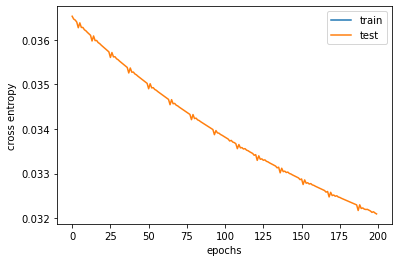

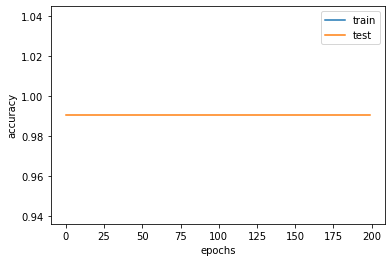

In [18]:
import matplotlib.pyplot as plt

plt.plot(train_loss_hist, label='train')
plt.plot(test_loss_hist, label='test')
plt.xlabel('epochs')
plt.ylabel('cross entropy')
plt.legend()
plt.show()

plt.plot(train_acc_hist, label='train')
plt.plot(test_acc_hsit, label='test')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
